In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib.pyplot import rcParams

file = pd.read_csv('datasets_1923_3359_austin_weather.csv')


In [221]:
print(" the values  : ",file.columns.values)
file.head()


 the values  :  ['Date' 'TempHighF' 'TempAvgF' 'TempLowF' 'DewPointHighF' 'DewPointAvgF'
 'DewPointLowF' 'HumidityHighPercent' 'HumidityAvgPercent'
 'HumidityLowPercent' 'SeaLevelPressureHighInches'
 'SeaLevelPressureAvgInches' 'SeaLevelPressureLowInches'
 'VisibilityHighMiles' 'VisibilityAvgMiles' 'VisibilityLowMiles'
 'WindHighMPH' 'WindAvgMPH' 'WindGustMPH' 'PrecipitationSumInches'
 'Events']


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [222]:
file.describe().T #colum  عمل جميع العمليات الاحصائيه لكل  


,count,mean,std,min,25%,50%,75%,max
TempHighF,1319.0,80.862775,14.766523,32.0,72.0,83.0,92.0,107.0
TempAvgF,1319.0,70.642911,14.045904,29.0,62.0,73.0,83.0,93.0
TempLowF,1319.0,59.902957,14.190648,19.0,49.0,63.0,73.0,81.0


In [223]:
file.info() # ...مثل نوع البيانات عدد الكولوم الذاكره المستخدمه الخfile تعمل علي جمع المعلومات الموجوده في info دالة 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [224]:
file.dtypes #  التعرف علي نوع البيانات 


Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object

In [225]:
quantitative = file.select_dtypes(include = ["int64","float64"]).keys() #int64,float64 ايجاد او جلب المتغيرات (او الاعمده) التي تحتوي علي نوع 
print(quantitative) 

Index(['TempHighF', 'TempAvgF', 'TempLowF'], dtype='object')


In [226]:
file['Date'] = pd.to_datetime(file['Date']) # تحويل التاريخ المنسق الي (سنه,شهر,يوم)
file['year'] = file['Date'].dt.year # جلب السنه من التاريخ
file['month'] = file['Date'].dt.month # جلب الشهر من التاريخ 
file['day'] = file['Date'].dt.day # جلب اليوم من التاريخ
file.head() # اظهار اول خمس اسطر

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events,year,month,day
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,7,2,20,4,31,0.46,"Rain , Thunderstorm",2013,12,21
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,10,5,16,6,25,0,,2013,12,22
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,10,10,8,3,12,0,,2013,12,23
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,10,7,12,4,20,0,,2013,12,24
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,10,7,10,2,16,T,,2013,12,25


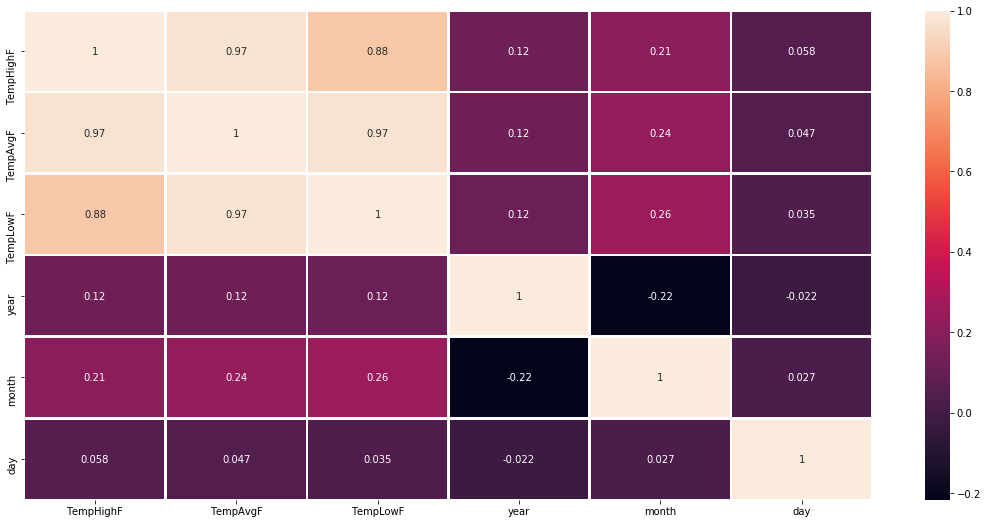

In [227]:
f,ax = plt.subplots(figsize=(19, 9)) 
sns.heatmap(file.corr(), annot=True, linewidths=1.5,ax=ax) # عمل خريطة الحراره 
# file.corr() لحساب الارتباط بين الطرفين
#annot=True لوضع الارقام فوق المربعات للتوضيح
# linewidths=1.5 لعمل خطوت بين المربعات  
plt.show()

In [228]:
file[quantitative].describe() #int, float  عمل الاحصائيات للمتغرات التي تحتوي علي 

,TempHighF,TempAvgF,TempLowF
count,1319.000000,1319.000000,1319.000000
mean,80.862775,70.642911,59.902957
std,14.766523,14.045904,14.190648
min,32.000000,29.000000,19.000000
25%,72.000000,62.000000,49.000000
50%,83.000000,73.000000,63.000000
75%,92.000000,83.000000,73.000000
max,107.000000,93.000000,81.000000


Text(0.5, 1.0, 'TempLowF')

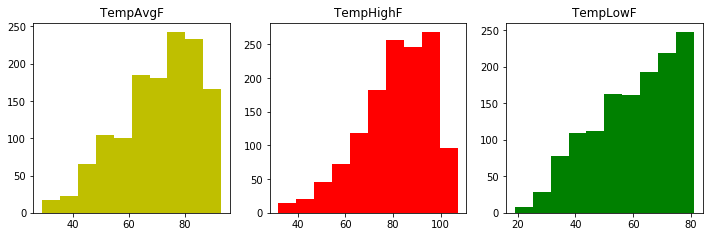

In [229]:
#TempHigh,TempAvg,TempLow في ثلاث اشكال لل hist رسم 
fig,axes=plt.subplots(1,3,figsize=(12,3.5))
axes[1].hist(file['TempHighF'],color='r') # ارتفاع درجة الحرارة 
axes[1].set_title("TempHighF")
axes[0].hist(file['TempAvgF'],color='y') # متوسط درجة الحرارة
axes[0].set_title("TempAvgF")
axes[2].hist(file['TempLowF'],color= 'g') # انخفاض درجة الحرارة
axes[2].set_title("TempLowF")

#rcParams['figure.figsize'] = 9,9 
#file[quantitative].hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D70AD29F48>,
      dtype=object)

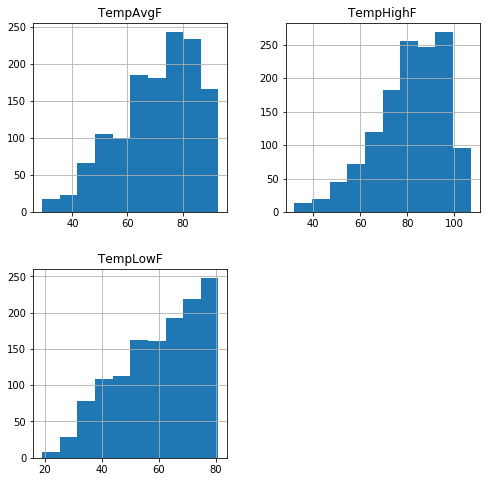

In [230]:
# رسم نفس الاشكال ولكن بكود مختصر وبسيط
rcParams['figure.figsize'] = 8,8
file[quantitative].hist()

In [238]:



slope, intercept, r, p, std_err = stats.linregress(x=file.month, y=file['TempHighF'])

def myfunc(x):# تساعد هذه الداله في التوقع لقيمه جديده مثل توقع لشهر معين
  return slope * x + intercept

speed = myfunc(5) # هنا تستدعي الداله وتحدد القيمه المراد التوقع عليه 
print('temperature',speed,'Cْ') # ثم طباعة التوقع


temperature 79.81577275761134 Cْ


Text(0, 0.5, 'Temp High')

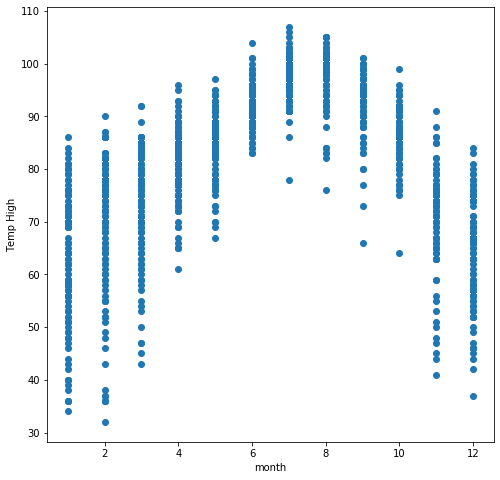

In [243]:
# للاشهر بدرجة الحراره scatter  رسم 
plt.scatter(x=file.month, y=file['TempHighF']) 
plt.xlabel("month")
plt.ylabel("Temp High")


In [244]:
x=file[['month','day']] # الاشهر والايام للتنبوؤ بيوم وشهر معين
y=file[['TempHighF','TempLowF','TempAvgF']] # درجة الحراره المرتفعه والمتوسطه والمنخفضه 
regr=LinearRegression().fit(x,y) # التوقع بقيمة الاكس والواي
prdic=regr.predict([[9,17]]) # تحديد الشهر واليوم المراد التنبؤ به
print('prdiction :', prdic ,'Cْ') # طباعة التنبؤ



prdiction : [[83.49653752 62.98436579 73.49098368]] Cْ
